# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [69]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [70]:
iterationNumber = 1

# 1. Read the File to Acquire the Filename

In [71]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_01': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1L

In [72]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_01']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21012~A.0019.K.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21486~A.0020.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21563~A.0006.K.jpg.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21570~A.0001.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21587~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21890~A.0005.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21902~A.0010.K.jpg.1R.bmp',
 'D:\\Users\\Chuan\\D

In [73]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_01': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21000~A.0001.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21001~A.0008.K.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21002~A.0024.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\w21008~A.0008.K.jpg.1R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_01\\W21011~A.0008.K.1R.bmp',
  'D:\\

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [74]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  1
chr_01
   Train: 
        w21000~A.0001.K.jpg.1L.bmp
        w21001~A.0008.K.1L.bmp
        w21001~A.0008.K.1R.bmp
        w21002~A.0024.K.jpg.1L.bmp
        w21002~A.0024.K.jpg.1R.bmp
        w21008~A.0008.K.jpg.1L.bmp
        w21008~A.0008.K.jpg.1R.bmp
        W21011~A.0008.K.1L.bmp
        W21011~A.0008.K.1R.bmp
        W21012~A.0019.K.1L.bmp
        W21012~A.0019.K.1R.bmp
        W21014~A.0005.K.1L.bmp
        W21014~A.0005.K.1R.bmp
        W21022~A.0007.K.jpg.1L.bmp
        W21022~A.0007.K.jpg.1R.bmp
        W21025~A.0002.K.jpg.1R.bmp
        W21027~A.0003.K.1L.bmp
        W21027~A.0003.K.1R.bmp
        W21486~A.0020.K.jpg.1L.bmp
        W21486~A.0020.K.jpg.1R.bmp
        W21486~A.0020.K.jpg.2R.bmp
        W21559~A.0005.1L.bmp
        W21559~A.0005.1R.bmp
        W21563~A.0006.K.1R.bmp
        W21563~A.0006.K.jpg.bmp
        W21570~A.0001.K.jpg.1L.bmp
        W21570~A.0001.K.jpg.1R.bmp
        W21576~A.0010.K.jpg.1L.bmp
        W21576~A.0010.K.jpg.1R.bmp
        W

        W23084~A.0003.K.jp.22R.bmp
   Test: 
        w21001~A.0008.K.jpg.22R.bmp
        W21486~A.0020.K.bmp.22R.bmp
        W21588~A.0001.K.jpg.22R.bmp
        W21766~A.0025.K.jpg.22L.bmp
        W21894~A.0009.K.jpg.22L.bmp
        W21905~A.0007.K.jpg.22R.bmp
        w22038~A.0017.K.jpg.22R.bmp
        W22451~A.0011.K.jpg.22R.bmp
        W22455~A.0002.K.jpg.22L.bmp
        W22666-1.0002.K.jpg.22R.bmp
        W22670~A.0006.K.jpg.22R.bmp
        W22672~A.0004.K.jpg.22L.bmp
        W22672~A.0004.K.jpg.22R.bmp
        W23070~A.0001.K.jpg.22L.bmp
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-13L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-17L.bmp
        191128-del(X)(p22)-18L.bmp
        191128-del(X)(p22)-19L.bmp
        191128-del(X)(p22)-1L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-d

### 3.1.1. Helper Functions

In [75]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [76]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [77]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

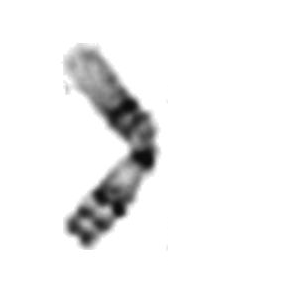

In [78]:
image['chr_01'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [79]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [80]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [81]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [82]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [83]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [84]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
  
               }

In [85]:
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
       
               }

In [86]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [87]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [88]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [89]:
y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12

In [90]:
len(X_train)

1938

In [91]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [92]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [95]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='softmax'))

### 3.2.4. Tensorboard Initilization

In [96]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 3.2.5. Compile the modal

In [97]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [98]:
model.fit(X_train, y_train, epochs=60, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/60
31/31 [==============================] - 6s 177ms/step - loss: 51.1896 - accuracy: 0.1920 - val_loss: 1.9570 - val_accuracy: 0.5309
Epoch 2/60
31/31 [==============================] - 3s 108ms/step - loss: 1.0877 - accuracy: 0.6894 - val_loss: 0.6466 - val_accuracy: 0.7716
Epoch 3/60
31/31 [==============================] - 4s 117ms/step - loss: 0.4349 - accuracy: 0.8658 - val_loss: 0.4992 - val_accuracy: 0.8272
Epoch 4/60
31/31 [==============================] - 3s 109ms/step - loss: 0.2137 - accuracy: 0.9283 - val_loss: 0.4404 - val_accuracy: 0.8704
Epoch 5/60
31/31 [==============================] - 3s 110ms/step - loss: 0.1311 - accuracy: 0.9572 - val_loss: 0.3662 - val_accuracy: 0.8930
Epoch 6/60
31/31 [==============================] - 3s 109ms/step - loss: 0.5793 - accuracy: 0.8096 - val_loss: 0.5288 - val_accuracy: 0.8210
Epoch 7/60
31/31 [==============================] - 4s 122ms/step - loss: 0.3454 - accuracy: 0.8875 - val_loss: 0.4082 - val_accuracy: 0.8909
Epoch

31/31 [==============================] - 4s 117ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.4033 - val_accuracy: 0.9342
Epoch 59/60
31/31 [==============================] - 3s 112ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.4041 - val_accuracy: 0.9321
Epoch 60/60
31/31 [==============================] - 3s 108ms/step - loss: 7.9792e-04 - accuracy: 0.9995 - val_loss: 0.4144 - val_accuracy: 0.9321


### 3.2.7 Summary

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

### 3.2.8. Tensorboard Display

In [100]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14796), started 19:11:43 ago. (Use '!kill 14796' to kill it.)

## 3.8 Save the Model

In [101]:
model.save('saved_model/model_allClass_cnn_iteration_All_Normal'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_allClass_cnn_iteration_All_Normal1\assets


## 3.9 Load the Model

In [102]:
model_reload = keras.models.load_model('saved_model/model_allClass_cnn_iteration_All_Normal'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [103]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.932


In [104]:
len(X_test)

486

In [105]:
y_predict = model_reload.predict(X_test)

In [106]:
len(y_predict)

486

In [107]:
type(y_test)

numpy.ndarray

In [108]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [109]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y']

label_convert = []

for i in range(24):
    label_convert.append(chromConvert_reverse[i])

In [110]:
type(y_predict_filtered)

list

In [111]:
type(y_predict)

numpy.ndarray

### 3.10.1 Save y_test and y_predict

In [112]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [113]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [114]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [115]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    a = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    b = np.load(f2)

In [116]:
a

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12

In [117]:
b

array([[6.13610318e-15, 1.00000000e+00, 1.43528800e-09, ...,
        1.91407415e-24, 2.70157921e-28, 2.05738190e-25],
       [5.32782325e-12, 2.07969308e-10, 1.00000000e+00, ...,
        1.93394484e-21, 3.56325852e-23, 1.21123475e-20],
       [7.73582753e-10, 9.99019742e-01, 9.79859848e-04, ...,
        1.08414168e-20, 7.19602073e-25, 1.37275954e-20],
       ...,
       [1.95677621e-16, 1.46246794e-14, 3.77936479e-14, ...,
        3.30695076e-21, 7.07202164e-22, 3.05517604e-21],
       [1.58680419e-25, 3.06295974e-21, 6.37723335e-21, ...,
        7.20755978e-33, 2.49732746e-32, 6.04989091e-32],
       [4.74819197e-19, 1.86348858e-14, 4.45331426e-15, ...,
        3.22836214e-21, 6.26568271e-21, 1.16042010e-20]], dtype=float32)

### 3.10.2. Classification Report

In [118]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

              precision    recall  f1-score   support

       chr_x       0.88      0.97      0.93        38
      chr_01       0.93      0.93      0.93        15
      chr_02       0.87      0.93      0.90        14
      chr_03       1.00      0.79      0.88        14
      chr_04       0.87      0.93      0.90        14
      chr_05       0.97      0.93      0.95        40
      chr_06       0.87      0.93      0.90        14
      chr_07       0.85      0.79      0.81        14
      chr_08       0.85      0.79      0.81        14
      chr_09       0.92      0.87      0.89        52
      chr_10       0.93      0.93      0.93        14
      chr_11       1.00      1.00      1.00        14
      chr_12       1.00      1.00      1.00        14
      chr_13       0.93      0.93      0.93        14
      chr_14       1.00      0.93      0.96        14
      chr_15       0.93      0.93      0.93        14
      chr_16       0.93      1.00      0.97        14
      chr_17       1.00    

### 3.10.3. Confusion Matrix

In [119]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_01,0,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,1,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,1,11,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,2,37,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr_06,0,0,0,0,0,0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,1,0,0,0,0,0,0,11,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,11,3,...,0,0,0,0,0,0,0,0,0,0
chr_09,4,0,0,0,0,0,0,1,2,45,...,0,0,0,0,0,0,0,0,0,0


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [120]:
subtotal = [0] * 24  
for item in y_test:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [121]:
cm_r = []
for i in range(24):
    cm_r.append(cm[i]/subtotal[i])

In [122]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion_r

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,0.973684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.000000,0.000000,0.000000,0.000000
chr_01,0.000000,0.933333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_02,0.000000,0.071429,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_03,0.000000,0.000000,0.071429,0.785714,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_04,0.000000,0.000000,0.000000,0.000000,0.928571,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_05,0.000000,0.000000,0.000000,0.000000,0.050000,0.925000,0.000000,0.000000,0.000000,0.025000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.928571,0.071429,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_07,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.071429,0.0,0.000000,0.000000,0.000000,0.000000
chr_08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714,0.214286,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_09,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019231,0.038462,0.865385,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### 3.10.6 Precision (查准率）

In [123]:
subtotal_predict = [0] * 24  
for item in y_predict_filtered:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [124]:
cm_p = []
for i in range(24):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [125]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion_p

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,0.880952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.095238,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_01,0.000000,0.933333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_02,0.000000,0.066667,0.866667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_04,0.000000,0.000000,0.000000,0.000000,0.866667,0.133333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_05,0.000000,0.000000,0.000000,0.000000,0.026316,0.973684,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_06,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.866667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.846154,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.153846,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
chr_09,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.061224,0.918367,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


#### Heat Map: Number

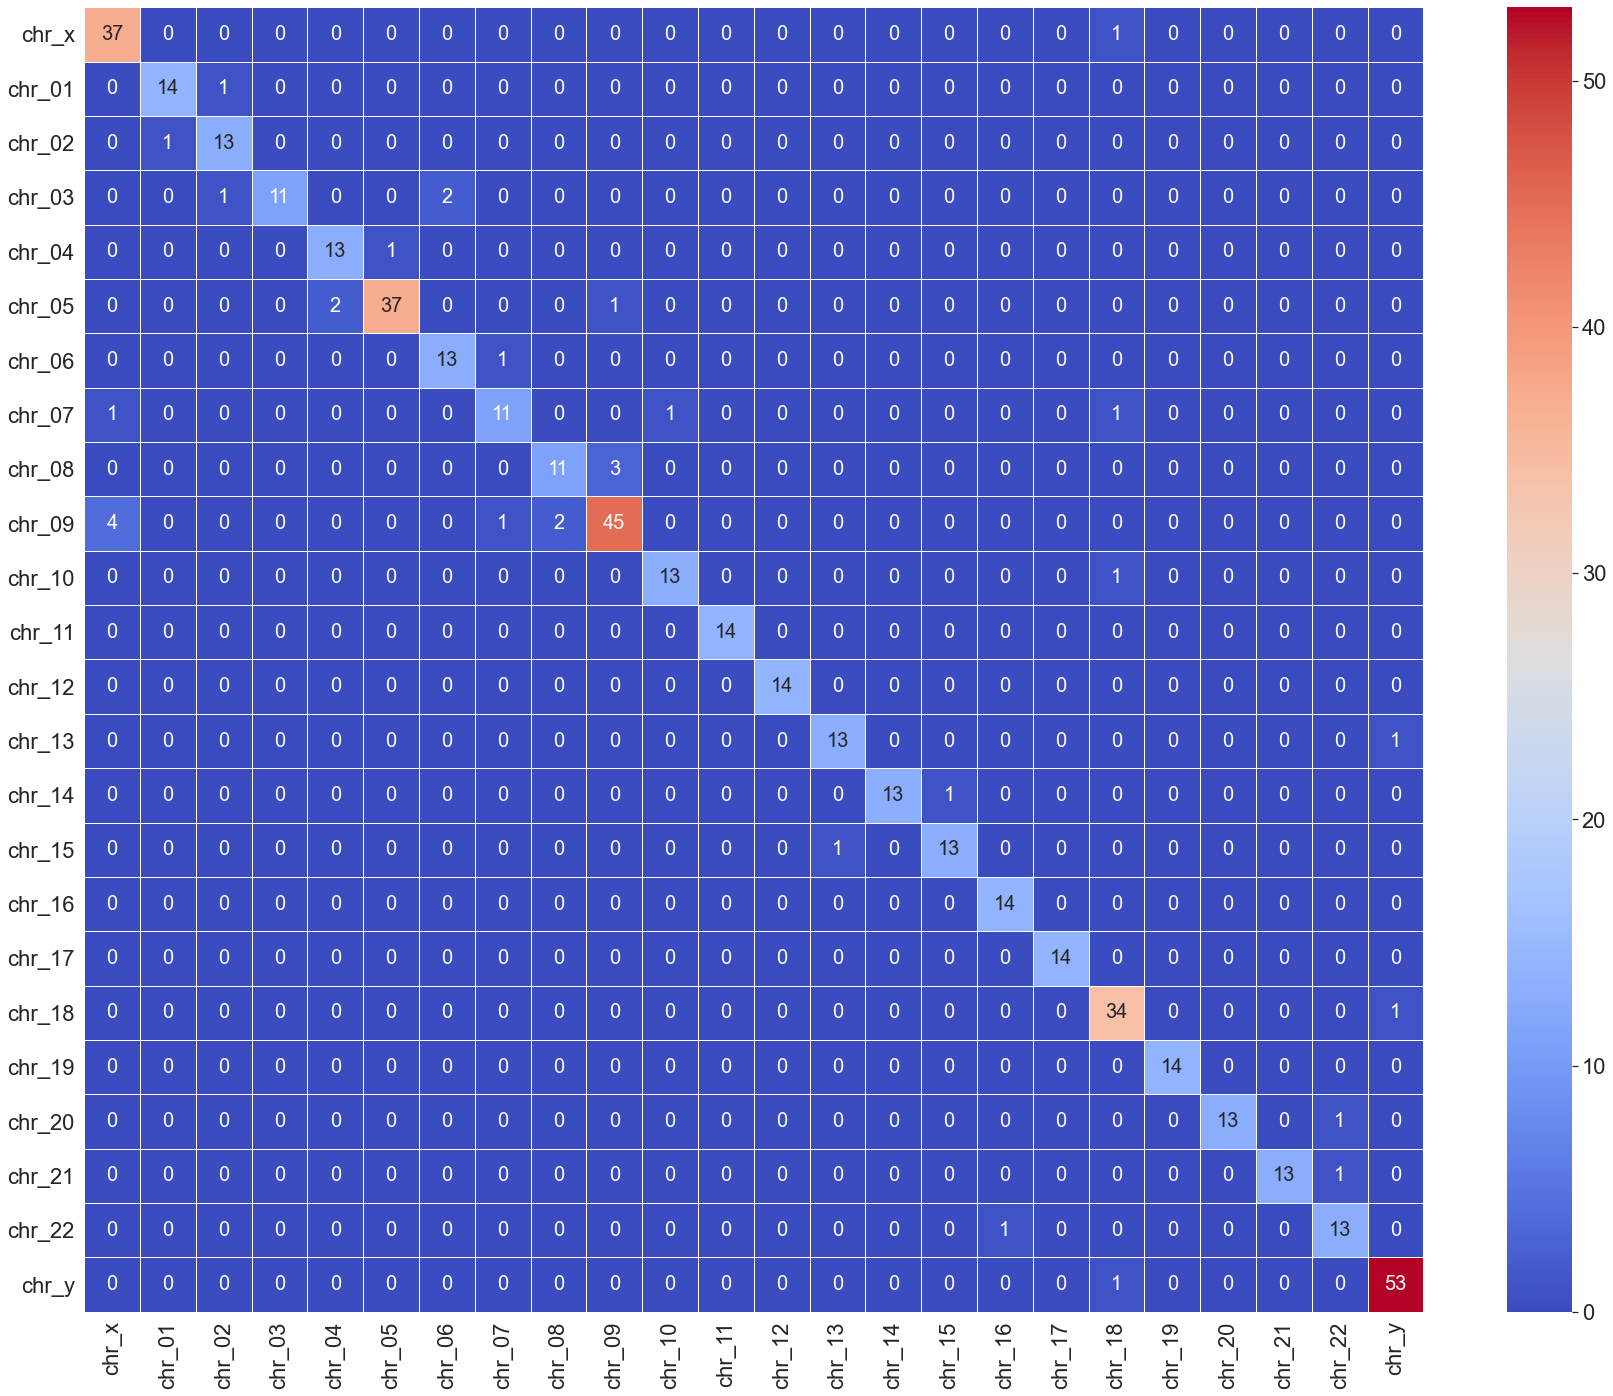

In [126]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map of Recall: Rate (important!!!)

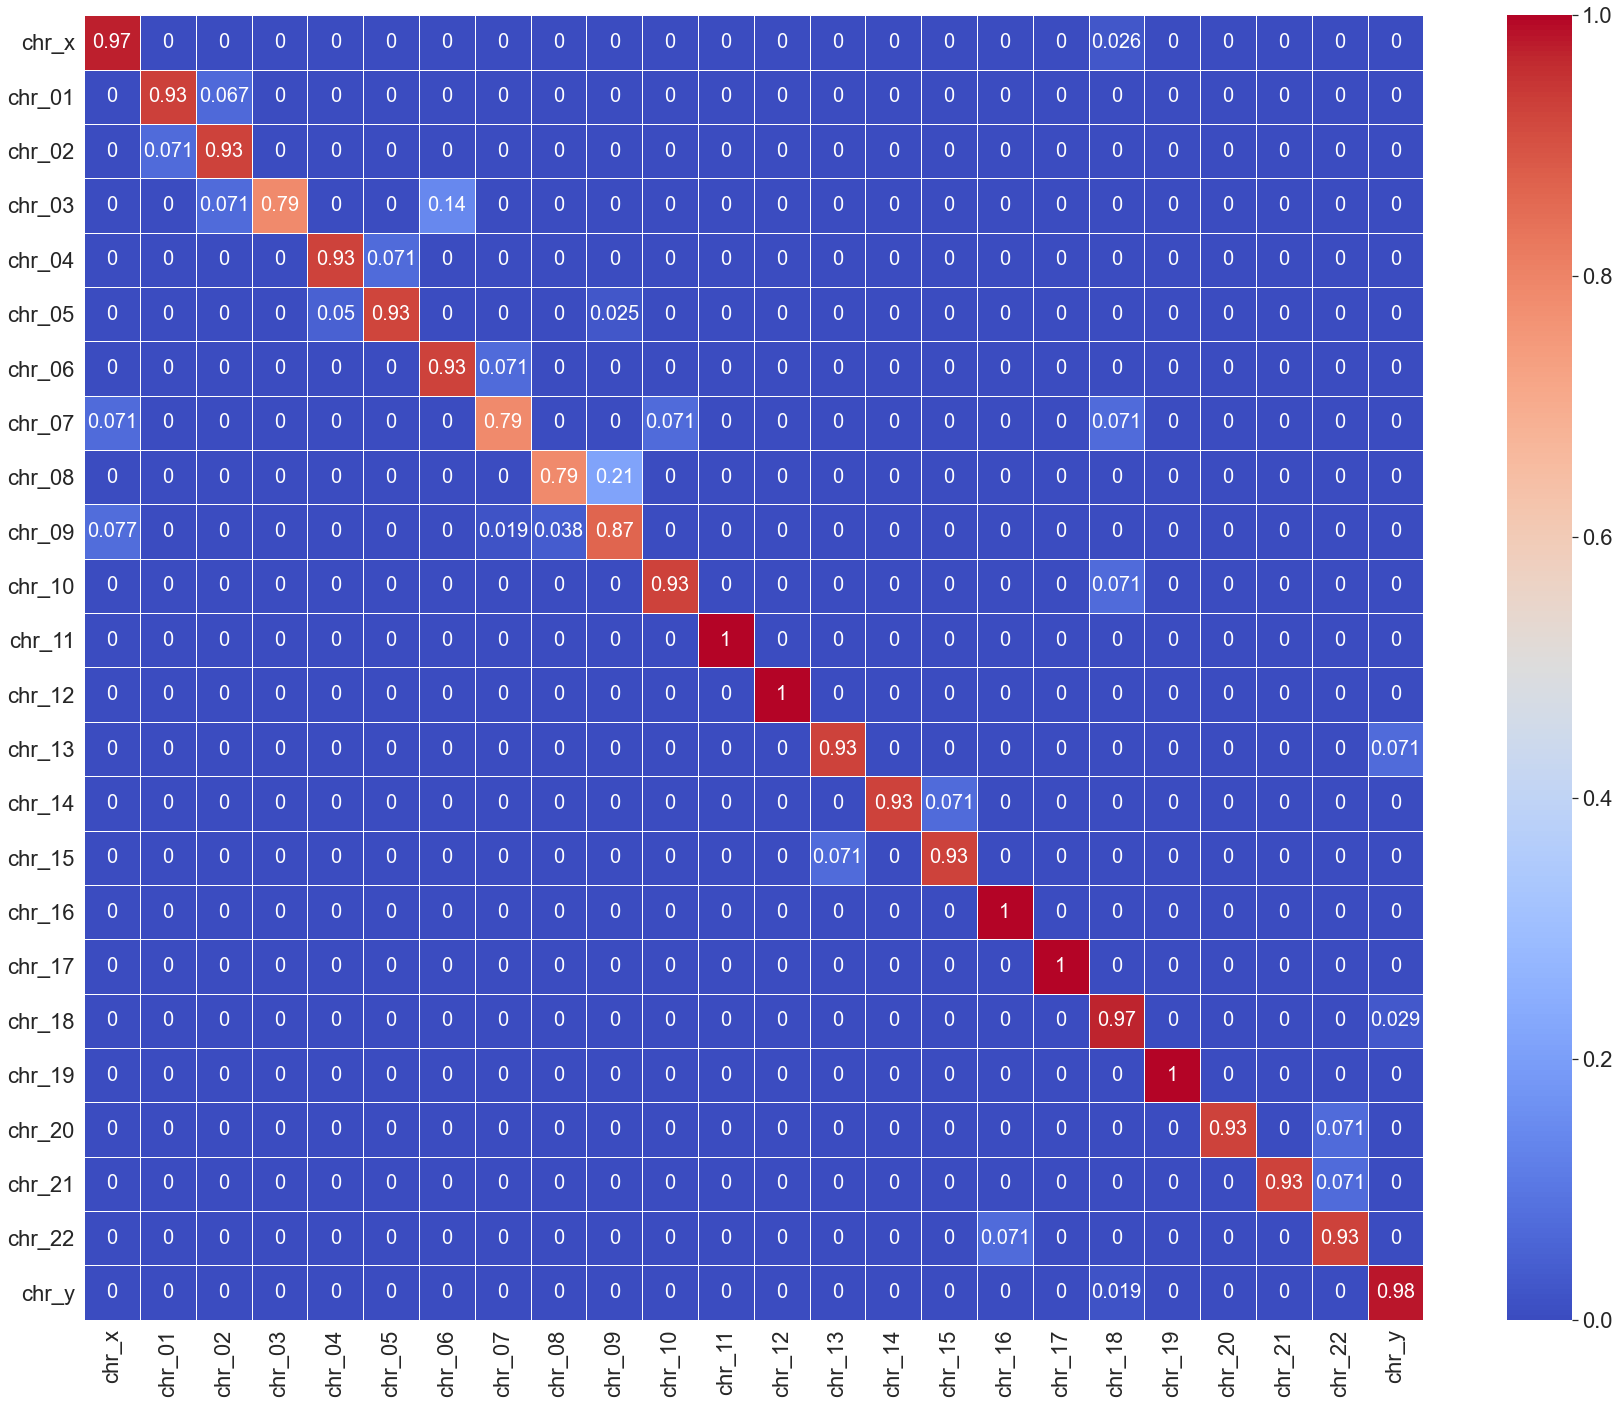

In [127]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

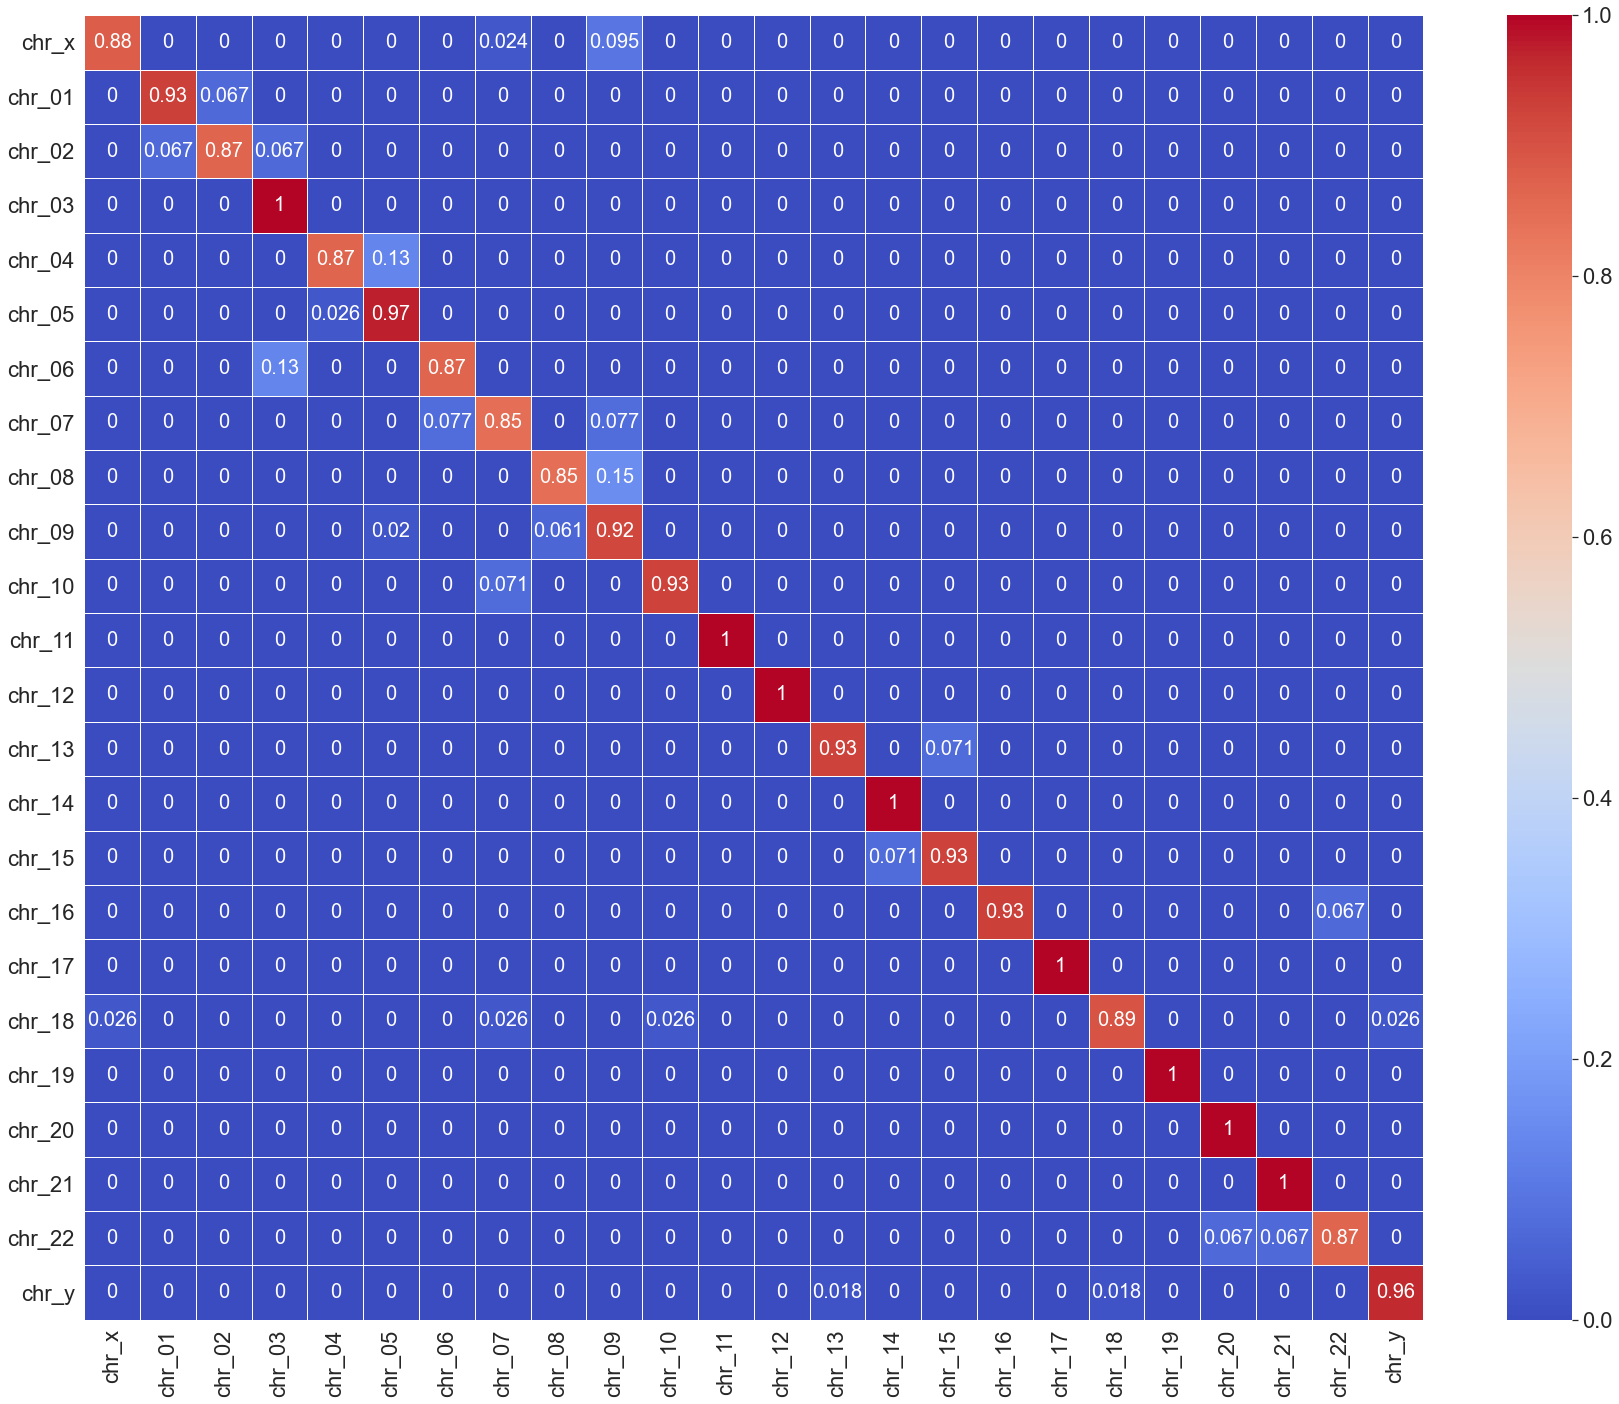

In [128]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [129]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [130]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [131]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [132]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.932


In [133]:
print(performanceReport)

              precision    recall  f1-score   support

       chr_x       0.88      0.97      0.93        38
      chr_01       0.93      0.93      0.93        15
      chr_02       0.87      0.93      0.90        14
      chr_03       1.00      0.79      0.88        14
      chr_04       0.87      0.93      0.90        14
      chr_05       0.97      0.93      0.95        40
      chr_06       0.87      0.93      0.90        14
      chr_07       0.85      0.79      0.81        14
      chr_08       0.85      0.79      0.81        14
      chr_09       0.92      0.87      0.89        52
      chr_10       0.93      0.93      0.93        14
      chr_11       1.00      1.00      1.00        14
      chr_12       1.00      1.00      1.00        14
      chr_13       0.93      0.93      0.93        14
      chr_14       1.00      0.93      0.96        14
      chr_15       0.93      0.93      0.93        14
      chr_16       0.93      1.00      0.97        14
      chr_17       1.00    

In [134]:
type(performanceReport)

str

In [135]:
confusion

,chr_x,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,...,chr_14,chr_15,chr_16,chr_17,chr_18,chr_19,chr_20,chr_21,chr_22,chr_y
chr_x,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_01,0,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,1,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,1,11,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,2,37,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr_06,0,0,0,0,0,0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,1,0,0,0,0,0,0,11,0,0,...,0,0,0,0,1,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,11,3,...,0,0,0,0,0,0,0,0,0,0
chr_09,4,0,0,0,0,0,0,1,2,45,...,0,0,0,0,0,0,0,0,0,0


## Export to a text file

In [136]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()